# Imports

In [ ]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_predictions_vgg19

from IPython.core.display import display

# Constants

In [ ]:
FILE_1 = "01 Umbrella.jpg"
FILE_2 = "02 Couple.jpg"
FILE_3 = "03 Ocean.jpg"
FILE_4 = "04 Horse.jpg"
FILE_5 = "05 City.jpg"
FILE_6 = "06 Feet.jpg"
FILE_7 = "07 Stairs.jpg"
FILE_8 = "08 Doorway.jpg"
FILE_9 = "09 Ice Cream.jpg"
FILE_10 = "10 Red Shoes.jpg"
FILE_11 = "11 Shoe.jpg"

# Preprocessing Images

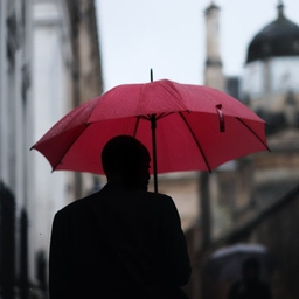

In [ ]:
pic = load_img(FILE_1, target_size=(299, 299))
display(pic)

In [ ]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [ ]:
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [ ]:
preprocessed = preprocess_input(expanded)

In [ ]:
def format_img_inceptionresnet(file):
  pic = load_img(file, target_size=(299, 299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  return preprocess_input(expanded)

# Load InceptionResNet

In [ ]:
%%time

inception_model = InceptionResNetV2(weights="imagenet")

225209952/225209952 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CPU times: user 8.35 s, sys: 1.89 s, total: 10.2 s
Wall time: 10.5 s


In [ ]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions

In [ ]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


[[('n04507155', 'umbrella', 0.8298835),
  ('n03788195', 'mosque', 0.0012544575),
  ('n03792972', 'mountain_tent', 0.0012220609),
  ('n03220513', 'dome', 0.0011231134),
  ('n04479046', 'trench_coat', 0.0010624696)]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


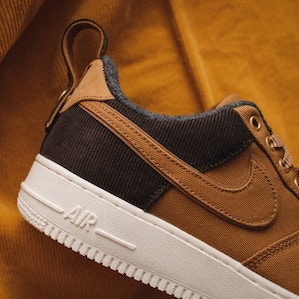

[[('n04133789', 'sandal', 0.3336538),
  ('n04120489', 'running_shoe', 0.15787144),
  ('n03680355', 'Loafer', 0.09391503),
  ('n04200800', 'shoe_shop', 0.054056425),
  ('n04026417', 'purse', 0.03767305)]]

In [ ]:
data = format_img_inceptionresnet(FILE_11)
prediction = inception_model.predict(data)
display(load_img(FILE_11))
decode_predictions(prediction)

# Testing the VGG19 Model

In [ ]:
def format_img_vgg19(file):
  pic = load_img(file, target_size=(224, 224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  return preprocess_input_vgg19(expanded)

In [ ]:
vgg_model = VGG19(weights="imagenet")

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


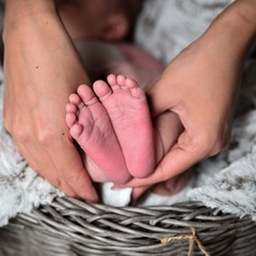

[[('n07880968', 'burrito', 0.33355778),
  ('n01817953', 'African_grey', 0.1090562),
  ('n03992509', "potter's_wheel", 0.048200753),
  ('n07860988', 'dough', 0.03728443),
  ('n01748264', 'Indian_cobra', 0.026734088)]]

In [ ]:
data = format_img_vgg19(FILE_6)
prediction = vgg_model.predict(data)
display(load_img(FILE_6))
decode_predictions_vgg19(prediction)